<a href="https://colab.research.google.com/github/Baldros/AnaliseRegressao-UFRJ/blob/main/Padroniza%C3%A7%C3%A3oR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Padronização dos dados.

# Preparando ambiente:

**Gerando dados artificiais**

In [2]:
# Gerando dados:
X = 2*runif(100)
Y = 4 + 3*X + runif(100)

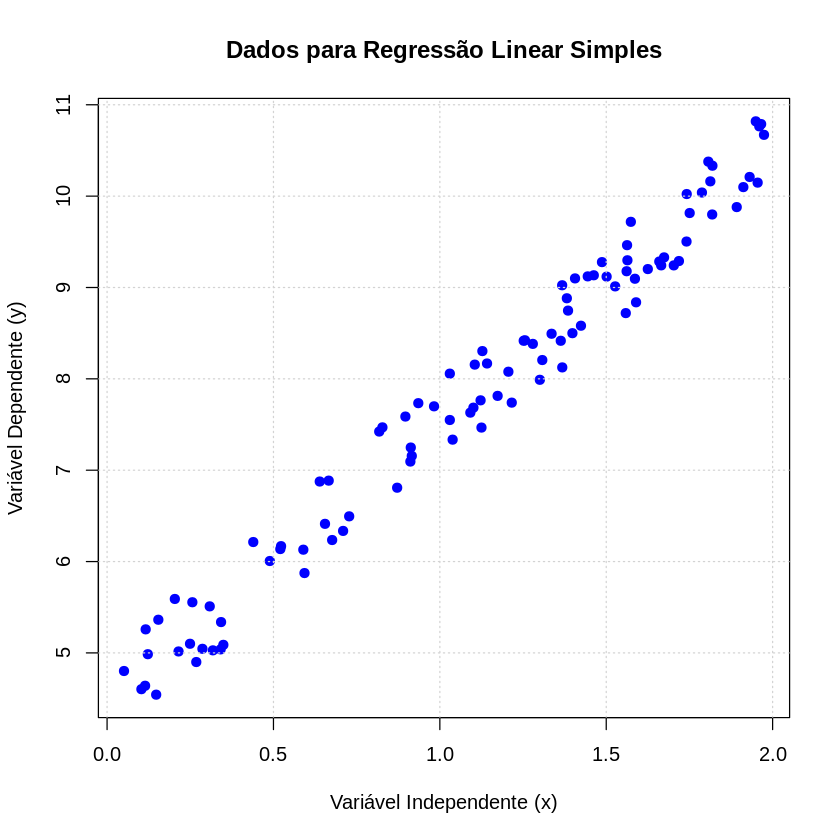

In [3]:
# Visualizando os dados
plot(X, Y, col = 'blue', xlab = 'Variável Independente (x)', ylab = 'Variável Dependente (y)',
     main = 'Dados para Regressão Linear Simples', pch = 19)
grid()  # Ativar a grade

**Funções Utilizadas**

In [4]:
fit <- function(x,y){
  #----------------------------------------
  # Função criada para gerar calcular
  # coeficientes coeficientes da regressão.
  #
  # Entradas:
  # Vetor - Variável Preditora;
  # Vetor - Variável Dependente.
  #
  # Saída:
  # Vetor - Interceptor e Coeficiente Angular.
  #----------------------------------------

  # Gerando médias:
  xbarra <- mean(x)
  ybarra <- mean(y)

  # Calculo dos coeficientes:
  ## Coeficiente Angular:
  b1 <- sum((x-xbarra)*(y-ybarra))/sum((x-xbarra)^2)

  ## Interceptor:
  b0 <- ybarra - b1*xbarra

  return(c(b0,b1))

}

In [5]:
reg <- function(coef, x){
  #------------------------------
  # Função criada para, dado os coeficientes
  # calcular o nosso valor esperado para cada
  # tupla de (preditora, dependente).
  #
  # Entrada:
  # Vetor - Coeficientes;
  # Vetor - Variável Preditora.
  #
  # Saída:
  # Vetor - Predição.
  #------------------------------
  ypred = coef[1] + coef[2]*x
  return(ypred)
}

In [6]:
visualization <- function(x, y, predict = NULL, coeficientes = NULL, posicao_legenda, xlabel, ylabel) {
  #------------------------------------------------------------
  # Função criada para gerar as visualizações dos conjuntos de
  # dados, com e sem a reta de regressão.
  #
  # Entrada:
  # Vetores - Variável preditora, Variável dependente;
  # Vetores opcionais - valores esperados, coeficientes;
  # string - legendas;
  #
  # Saída:
  # Visualização - Informação gráfica.
  #------------------------------------------------------------


  # Visualizando os dados
  plot(x, y, col = 'blue', xlab = xlabel, ylab = ylabel,
       main = 'Dados para Regressão Linear Simples', pch = 19)
  grid()  # Ativar a grade

  # Checando se foi informado as informações da reta de regressão:
  if (!is.null(predict) && !is.null(coeficientes)) {
    # Adicionando a reta de regressão
    lines(x, predict, col = 'red')
    # Adicionando ponto para o intercepto
    points(0, coeficientes[1], col = 'green', pch = 19)
    # Adicionando legenda do gráfico
    legend(posicao_legenda, legend=c("Dados Observados", "Reta de Regressão", "Intercepto"),
           col=c("blue", "red", "green"), pch=c(19, NA, 19), lty=c(0, 1, 0), xpd=TRUE)

    resp <- sprintf("Coeficientes Encontrados: b0 = %.2f e b1 = %.2f", coeficientes[1], coeficientes[2])
    print(resp)
  }
}


# Testando sem padronização:

In [7]:
# Ajustando os coeficientes:
coefs <- fit(X,Y)

# Calculando a reta de regressão:
y_pred <- reg(coefs,X)

[1] "Coeficientes Encontrados: b0 = 4.46 e b1 = 3.04"


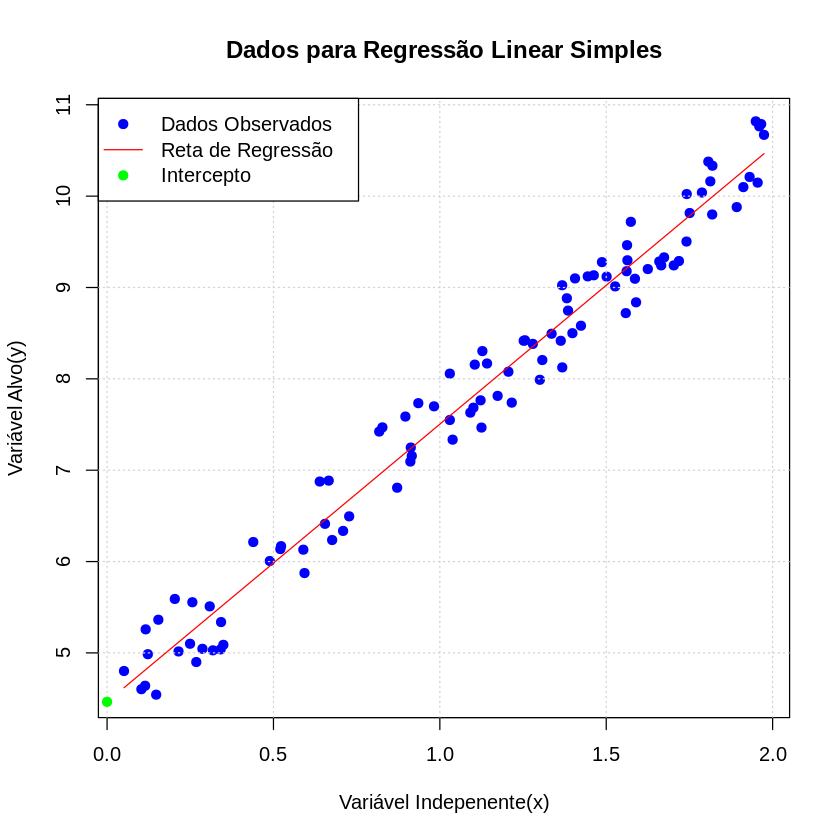

In [8]:
# Visualização:
visualization(X,Y,y_pred,coefs, "topleft",xlabel="Variável Indepenente(x)", ylabel="Variável Alvo(y)")

# Testando com Padronização:

In [9]:
# Padronizando a variável Preditora:
xp <- (X - mean(X))/sd(X)

In [10]:
# Ajustando os coeficientes:
coefs_padro <- fit(xp,Y)

# Calculando a reta de regressão:
y_pred_padro <- reg(coefs_padro,xp)

[1] "Coeficientes Encontrados: b0 = 7.83 e b1 = 1.73"


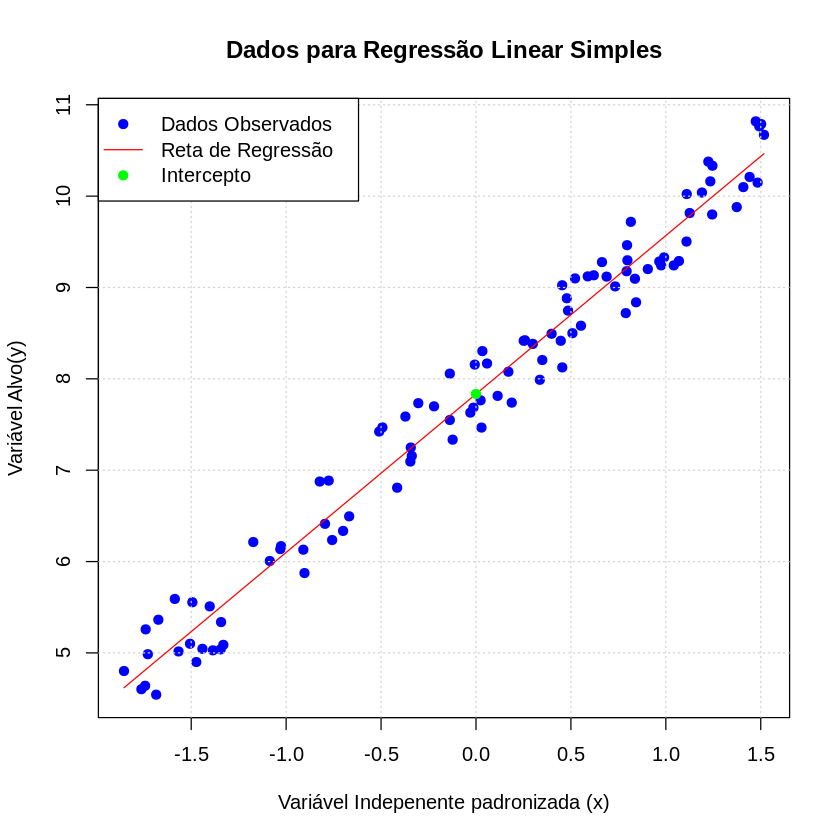

In [11]:
# Visualização:
visualization(xp,Y,y_pred_padro,coefs_padro,"topleft", xlabel="Variável Indepenente padronizada (x)", ylabel="Variável Alvo(y)")